In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
%matplotlib inline

In [3]:
# pip install --upgrade pandas openpyxl xlrd


In [4]:
# import pandas as pd
# stock_names = ["APOLLO", "BHP", "ICICI", "Infosys", "Tata-steel"]
# stock_files = ["updated_APOLLO dataset.csv","updated_merge bhp.csv","updated_ICICI Dataset.csv","updated_merge info.csv","updated_Tata-steel.csv"]
# # Dictionary to store dataframes
# stock_data = {}

# # Loop through each dataset and load it
# for stock_name, file in zip(stock_names, stock_files):
#     try:
#         # Read the dataset
#         df = pd.read_csv(file)

#         # Store in dictionary
#         stock_data[stock_name] = df

#         print(f"Successfully loaded {stock_name} dataset:")
#         print(df.head())  # Display first few rows
#         print("-" * 50) 

In [5]:
import pandas as pd

stock_names = ["APOLLO", "BHP", "ICICI", "Infosys", "Tata-steel"]
stock_files = [
    "updated_APOLLO dataset.csv",
    "updated_merge bhp.csv",
    "updated_ICICI Dataset.csv",
    "updated_merge info.csv",
    "updated_Tata-steel.csv"
]

# Dictionary to store dataframes
stock_data = {}

# Loop through each dataset and load it
for stock_name, file in zip(stock_names, stock_files):
    try:
        # Read the dataset
        df = pd.read_csv(file)

        # Store in dictionary
        stock_data[stock_name] = df

        print(f"Successfully loaded {stock_name} dataset:")
        print(df.head())  # Display first few rows
        print("-" * 50)

    except Exception as e:
        print(f"Failed to load {stock_name} from {file}")
        print("Error:", e)
        print("-" * 50)


Successfully loaded APOLLO dataset:
         Date  Open Price  High Price  Low Price  Close Price         WAP  \
0  2010-12-31      471.85      473.25     451.55       454.15  458.475477   
1  2010-12-30      468.00      474.85     467.10       471.60  471.286471   
2  2010-12-29      471.00      475.00     464.05       467.85  468.802646   
3  2010-12-28      466.40      472.00     462.25       465.85  464.867628   
4  2010-12-27      470.00      478.90     462.00       465.85  467.528218   

   No.of Shares  No. of Trades  Total Turnover (Rs.)  Deliverable Quantity  \
0         22775            701            10441779.0               15306.0   
1          3962            170             1867237.0                1953.0   
2          3628            231             1700816.0                1394.0   
3          3815            199             1773470.0                2019.0   
4          2020            159              944407.0                1160.0   

   % Deli. Qty to Traded Qty  Sp

In [6]:
# Loop through each dataset
for stock_name, file in zip(stock_names, stock_files):
    try:
        # Load the dataset
        df = pd.read_csv(file)
        
        # Print missing value counts
        print(f"Missing values in {stock_name} dataset:")
        print(df.isnull().sum())
        print("-" * 50)  # Separator for better readability

    except FileNotFoundError:
        print(f"Error: {file} not found. Check the file path.")
    except Exception as e:
        print(f"Error loading {file}: {e}")

Missing values in APOLLO dataset:
Date                         0
Open Price                   0
High Price                   0
Low Price                    0
Close Price                  0
WAP                          0
No.of Shares                 0
No. of Trades                0
Total Turnover (Rs.)         0
Deliverable Quantity         0
% Deli. Qty to Traded Qty    0
Spread High-Low              0
Spread Close-Open            0
dtype: int64
--------------------------------------------------
Missing values in BHP dataset:
Date                         0
Open Price                   0
High Price                   0
Low Price                    0
Close Price                  0
WAP                          0
No.of Shares                 0
No. of Trades                0
Total Turnover (Rs.)         0
Deliverable Quantity         0
% Deli. Qty to Traded Qty    0
Spread High-Low              0
Spread Close-Open            0
dtype: int64
--------------------------------------------------
M

In [7]:
# Loop through each dataset
import os
for file in stock_files:
    if os.path.exists(file):  # Check if file exists
        df = pd.read_csv(file)  # Load CSV file

        # Print duplicate count
        print(f"Duplicates in {file}: {df.duplicated().sum()}")

        # Drop duplicates
        df = df.drop_duplicates()

        # Save the cleaned CSV
        df.to_csv(file, index=False)
        print(f"Processed {file} - Duplicates removed and saved.\n")

    else:
        print(f"File not found: {file}")

Duplicates in updated_APOLLO dataset.csv: 0
Processed updated_APOLLO dataset.csv - Duplicates removed and saved.

Duplicates in updated_merge bhp.csv: 0
Processed updated_merge bhp.csv - Duplicates removed and saved.

Duplicates in updated_ICICI Dataset.csv: 0
Processed updated_ICICI Dataset.csv - Duplicates removed and saved.

Duplicates in updated_merge info.csv: 0
Processed updated_merge info.csv - Duplicates removed and saved.

Duplicates in updated_Tata-steel.csv: 0
Processed updated_Tata-steel.csv - Duplicates removed and saved.



In [8]:
import pandas as pd
import os

# List of dataset filenames
# stock_files = ["BHP DATASET.csv", "Tata DATASET.csv", "HDFC DATASET.csv", "Infosys DATASET.csv", "Reliance DATASET.csv"]

# Loop through each dataset and process it
for file in stock_files:
    try:
        # Load the dataset
        df = pd.read_csv(file)

        # Convert 'Date' column to datetime
        if 'Date' in df.columns:
            df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # Coerce errors to handle invalid dates

        # Save the updated CSV file
        df.to_csv(file, index=False)
        print(f" Successfully processed: {file}")

    except Exception as e:
        print(f" Error processing {file}: {e}")


 Successfully processed: updated_APOLLO dataset.csv
 Successfully processed: updated_merge bhp.csv
 Successfully processed: updated_ICICI Dataset.csv
 Successfully processed: updated_merge info.csv
 Successfully processed: updated_Tata-steel.csv


In [9]:
import pandas as pd
import os

# List of CSV dataset filenames
# stock_files = ["BHP_DATASET.csv", "Tata_DATASET.csv", "HDFC_DATASET.csv", "Infosys_DATASET.csv", "Reliance_DATASET.csv"]

# Loop through each dataset
for file in stock_files:
    if os.path.exists(file):  # Check if file exists
        try:
            df = pd.read_csv(file)  # Load CSV file
            
            if 'Deliverable Quantity' in df.columns:  # Check if column exists
                print(f"Deliverable Quantity for {file}:")
                print(df['Deliverable Quantity'])
                print("-" * 50)  # Separator for better readability
            else:
                print(f" Column 'Deliverable Quantity' not found in {file}.")
        
        except Exception as e:
            print(f"Error reading {file}: {e}")
    else:
        print(f"File not found: {file}")


Deliverable Quantity for updated_APOLLO dataset.csv:
0       15306.0
1        1953.0
2        1394.0
3        2019.0
4        1160.0
         ...   
3716     1728.0
3717      990.0
3718     2011.0
3719     2063.0
3720     1954.0
Name: Deliverable Quantity, Length: 3721, dtype: float64
--------------------------------------------------
Deliverable Quantity for updated_merge bhp.csv:
0        30620.0
1        22121.0
2        26644.0
3        15385.0
4         8290.0
          ...   
3717     51167.0
3718    116975.0
3719    136220.0
3720    231301.0
3721     53114.0
Name: Deliverable Quantity, Length: 3722, dtype: float64
--------------------------------------------------
Deliverable Quantity for updated_ICICI Dataset.csv:
0         58445.0
1         37531.0
2         49779.0
3         12787.0
4         12359.0
          ...    
3717     355806.0
3718     406265.0
3719     428999.0
3720    1497254.0
3721     278939.0
Name: Deliverable Quantity, Length: 3722, dtype: float64
-------------

In [10]:
import pandas as pd
import os
# Loop through each dataset
for file in stock_files:
    try:
        # Load the CSV file
        df = pd.read_csv(file)

        # Convert 'Date' column to datetime format
        df["Date"] = pd.to_datetime(df["Date"], format="%d-%b-%y", errors='coerce')

        # Save the updated CSV
        output_file = f"updated_{file}"
        df.to_csv(output_file, index=False)

        print(f" Successfully processed and saved: {output_file}")

    except FileNotFoundError:
        print(f"File not found: {file}")
        continue  # Skip this file

    except Exception as e:
        print(f" Error processing {file}: {e}")
        continue  # Skip this file


 Successfully processed and saved: updated_updated_APOLLO dataset.csv
 Successfully processed and saved: updated_updated_merge bhp.csv
 Successfully processed and saved: updated_updated_ICICI Dataset.csv
 Successfully processed and saved: updated_updated_merge info.csv
 Successfully processed and saved: updated_updated_Tata-steel.csv


In [11]:
import pandas as pd
# Loop through each dataset and print the "Date" column
for stock_name, file in zip(stock_names, stock_files):
    try:
        df = pd.read_csv(file)  # Load CSV file
        
        if "Date" in df.columns:  # Check if 'Date' column exists
            print(f"Dates in {stock_name} dataset:")
            print(df["Date"])  # Print Date column
        else:
            print(f" 'Date' column not found in {file}")
        
    except FileNotFoundError:
        print(f" File not found: {file}")
    
    except Exception as e:
        print(f" Error processing {file}: {e}")
    
    print("-" * 50)  # Separator for readability


Dates in APOLLO dataset:
0       2010-12-31
1       2010-12-30
2       2010-12-29
3       2010-12-28
4       2010-12-27
           ...    
3716    2024-01-08
3717    2024-01-05
3718    2024-01-04
3719    2024-01-03
3720    2024-01-02
Name: Date, Length: 3721, dtype: object
--------------------------------------------------
Dates in BHP dataset:
0       2010-12-31
1       2010-12-30
2       2010-12-29
3       2010-12-28
4       2010-12-27
           ...    
3717    2024-01-08
3718    2024-01-05
3719    2024-01-04
3720    2024-01-03
3721    2024-01-02
Name: Date, Length: 3722, dtype: object
--------------------------------------------------
Dates in ICICI dataset:
0       2010-12-31
1       2010-12-30
2       2010-12-29
3       2010-12-28
4       2010-12-27
           ...    
3717    2024-01-08
3718    2024-01-05
3719    2024-01-04
3720    2024-01-03
3721    2024-01-02
Name: Date, Length: 3722, dtype: object
--------------------------------------------------
Dates in Infosys dataset:
0  

In [12]:
import pandas as pd
# Loop through each dataset and print column names
for stock_name, file in zip(stock_names, stock_files):
    try:
        df = pd.read_csv(file)  # Load CSV file
        print(f"Columns in {stock_name}:")
        print(df.columns)  # Print column names
        print("-" * 50)  # Separator for readability

    except FileNotFoundError:
        print(f"Error: {file} not found. Check the file path.")
    except Exception as e:
        print(f"Error loading {file}: {e}")


Columns in APOLLO:
Index(['Date', 'Open Price', 'High Price', 'Low Price', 'Close Price', 'WAP',
       'No.of Shares', 'No. of Trades', 'Total Turnover (Rs.)',
       'Deliverable Quantity', '% Deli. Qty to Traded Qty', 'Spread High-Low',
       'Spread Close-Open'],
      dtype='object')
--------------------------------------------------
Columns in BHP:
Index(['Date', 'Open Price', 'High Price', 'Low Price', 'Close Price', 'WAP',
       'No.of Shares', 'No. of Trades', 'Total Turnover (Rs.)',
       'Deliverable Quantity', '% Deli. Qty to Traded Qty', 'Spread High-Low',
       'Spread Close-Open'],
      dtype='object')
--------------------------------------------------
Columns in ICICI:
Index(['Date', 'Open Price', 'High Price', 'Low Price', 'Close Price', 'WAP',
       'No.of Shares', 'No. of Trades', 'Total Turnover (Rs.)',
       'Deliverable Quantity', '% Deli. Qty to Traded Qty', 'Spread High-Low',
       'Spread Close-Open'],
      dtype='object')
-----------------------------

In [13]:
import pandas as pd
# Loop through each dataset and load it
for stock_name, file in zip(stock_names, stock_files):
    try:
        # Load the CSV file
        df = pd.read_csv(file)

        # Display dataset name and first five rows
        print(f"\nDataset: {stock_name}")
        print(df.head())

    except FileNotFoundError:
        print(f"Error: File '{file}' not found. Check the file path.")
    
    except Exception as e:
        print(f"Error loading '{file}': {e}")



Dataset: APOLLO
         Date  Open Price  High Price  Low Price  Close Price         WAP  \
0  2010-12-31      471.85      473.25     451.55       454.15  458.475477   
1  2010-12-30      468.00      474.85     467.10       471.60  471.286471   
2  2010-12-29      471.00      475.00     464.05       467.85  468.802646   
3  2010-12-28      466.40      472.00     462.25       465.85  464.867628   
4  2010-12-27      470.00      478.90     462.00       465.85  467.528218   

   No.of Shares  No. of Trades  Total Turnover (Rs.)  Deliverable Quantity  \
0         22775            701            10441779.0               15306.0   
1          3962            170             1867237.0                1953.0   
2          3628            231             1700816.0                1394.0   
3          3815            199             1773470.0                2019.0   
4          2020            159              944407.0                1160.0   

   % Deli. Qty to Traded Qty  Spread High-Low  Spre

In [14]:
import pandas as pd
# Loop through each dataset and print info
for stock_name, file in zip(stock_names, stock_files):
    try:
        # Read the CSV file
        df = pd.read_csv(file)

        # Print dataset info
        print(f"Dataset Info for {stock_name} ({file}):")
        print(df.info())
        print("-" * 50)  # Separator for better readability

    except FileNotFoundError:
        print(f"Error: {file} not found. Check the file name and path.")
    except Exception as e:
        print(f"Error loading {file}: {e}")


Dataset Info for APOLLO (updated_APOLLO dataset.csv):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3721 entries, 0 to 3720
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       3721 non-null   object 
 1   Open Price                 3721 non-null   float64
 2   High Price                 3721 non-null   float64
 3   Low Price                  3721 non-null   float64
 4   Close Price                3721 non-null   float64
 5   WAP                        3721 non-null   float64
 6   No.of Shares               3721 non-null   int64  
 7   No. of Trades              3721 non-null   int64  
 8   Total Turnover (Rs.)       3721 non-null   float64
 9   Deliverable Quantity       3721 non-null   float64
 10  % Deli. Qty to Traded Qty  3721 non-null   float64
 11  Spread High-Low            3721 non-null   float64
 12  Spread Close-Open          3721 non-null   float64

In [15]:
import pandas as pd
# Loop through each dataset
for file in stock_files:
    try:
        # Load the CSV file
        df = pd.read_csv(file)

        # Print dataset name
        print(f"Missing values in: {file}")
        
        # Print count of missing values in each column
        print(df.isnull().sum())
        
        print("-" * 50)  # Separator for readability

    except FileNotFoundError:
        print(f"File not found: {file}. Check the file path.")
    
    except Exception as e:
        print(f"Error processing {file}: {e}")


Missing values in: updated_APOLLO dataset.csv
Date                         0
Open Price                   0
High Price                   0
Low Price                    0
Close Price                  0
WAP                          0
No.of Shares                 0
No. of Trades                0
Total Turnover (Rs.)         0
Deliverable Quantity         0
% Deli. Qty to Traded Qty    0
Spread High-Low              0
Spread Close-Open            0
dtype: int64
--------------------------------------------------
Missing values in: updated_merge bhp.csv
Date                         0
Open Price                   0
High Price                   0
Low Price                    0
Close Price                  0
WAP                          0
No.of Shares                 0
No. of Trades                0
Total Turnover (Rs.)         0
Deliverable Quantity         0
% Deli. Qty to Traded Qty    0
Spread High-Low              0
Spread Close-Open            0
dtype: int64
------------------------------

In [16]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

In [17]:
import pandas as pd
# Loop through each dataset
for file in stock_files:
    try:
        # Load the CSV file
        df = pd.read_csv(file)

        # Display dataset name
        print(f"Dataset with Missing Values: {file}")
        
        # Print count of missing values in each column
        print(df.isnull().sum())  
        
        print("-" * 50)  # Separator for readability

    except FileNotFoundError:
        print(f"File not found: {file}. Check the file path.")
    
    except Exception as e:
        print(f"Error processing {file}: {e}")


Dataset with Missing Values: updated_APOLLO dataset.csv
Date                         0
Open Price                   0
High Price                   0
Low Price                    0
Close Price                  0
WAP                          0
No.of Shares                 0
No. of Trades                0
Total Turnover (Rs.)         0
Deliverable Quantity         0
% Deli. Qty to Traded Qty    0
Spread High-Low              0
Spread Close-Open            0
dtype: int64
--------------------------------------------------
Dataset with Missing Values: updated_merge bhp.csv
Date                         0
Open Price                   0
High Price                   0
Low Price                    0
Close Price                  0
WAP                          0
No.of Shares                 0
No. of Trades                0
Total Turnover (Rs.)         0
Deliverable Quantity         0
% Deli. Qty to Traded Qty    0
Spread High-Low              0
Spread Close-Open            0
dtype: int64
----------

In [18]:
import pandas as pd
from sklearn.impute import SimpleImputer
# Columns to apply imputation
columns_to_impute = ["Deliverable Quantity", "% Deli. Qty to Traded Qty"]

# Create an imputer with mean strategy
imputer = SimpleImputer(strategy="mean")

# Loop through each dataset
for file in stock_files:
    try:
        # Load the CSV file
        df = pd.read_csv(file)

        # Check if required columns exist in the dataset
        missing_cols = [col for col in columns_to_impute if col not in df.columns]
        if missing_cols:
            print(f"Skipping {file}: Missing columns {missing_cols}")
            continue

        # Apply imputation only on the selected columns
        df[columns_to_impute] = imputer.fit_transform(df[columns_to_impute])

        # Save the updated dataset
        output_file = f"Updated_{file}"
        df.to_csv(output_file, index=False)

        # Display confirmation message
        print(f"Imputation completed for {file}. Saved as {output_file}")

    except FileNotFoundError:
        print(f"File not found: {file}. Check the file path.")
    
    except Exception as e:
        print(f"Error processing {file}: {e}")


Imputation completed for updated_APOLLO dataset.csv. Saved as Updated_updated_APOLLO dataset.csv
Imputation completed for updated_merge bhp.csv. Saved as Updated_updated_merge bhp.csv
Imputation completed for updated_ICICI Dataset.csv. Saved as Updated_updated_ICICI Dataset.csv
Imputation completed for updated_merge info.csv. Saved as Updated_updated_merge info.csv
Imputation completed for updated_Tata-steel.csv. Saved as Updated_updated_Tata-steel.csv


In [19]:
import pandas as pd
# Loop through each dataset and check for missing values
for file in stock_files:
    try:
        # Load the CSV file
        df = pd.read_csv(file)

        # Display missing values count per column
        print(f"\nMissing Values in {file}:")
        print(df.isnull().sum())

    except FileNotFoundError:
        print(f"File not found: {file}. Check the file path.")
    
    except Exception as e:
        print(f"Error processing {file}: {e}")



Missing Values in updated_APOLLO dataset.csv:
Date                         0
Open Price                   0
High Price                   0
Low Price                    0
Close Price                  0
WAP                          0
No.of Shares                 0
No. of Trades                0
Total Turnover (Rs.)         0
Deliverable Quantity         0
% Deli. Qty to Traded Qty    0
Spread High-Low              0
Spread Close-Open            0
dtype: int64

Missing Values in updated_merge bhp.csv:
Date                         0
Open Price                   0
High Price                   0
Low Price                    0
Close Price                  0
WAP                          0
No.of Shares                 0
No. of Trades                0
Total Turnover (Rs.)         0
Deliverable Quantity         0
% Deli. Qty to Traded Qty    0
Spread High-Low              0
Spread Close-Open            0
dtype: int64

Missing Values in updated_ICICI Dataset.csv:
Date                         0
Op

In [20]:
import pandas as pd
# Loop through each dataset and select required columns
for file in stock_files:
    try:
        # Load the CSV file
        df = pd.read_csv(file)

        # Select specific columns
        finaldata = df[["Open Price", "Close Price", "High Price", "Low Price", "WAP"]]

        # Display the first few rows of the selected data
        print(f"\nSelected Data from {file}:")
        print(finaldata.head())

    except FileNotFoundError:
        print(f"File not found: {file}. Check the file path.")

    except KeyError:
        print(f"One or more columns are missing in {file}. Check column names.")

    except Exception as e:
        print(f"Error processing {file}: {e}")



Selected Data from updated_APOLLO dataset.csv:
   Open Price  Close Price  High Price  Low Price         WAP
0      471.85       454.15      473.25     451.55  458.475477
1      468.00       471.60      474.85     467.10  471.286471
2      471.00       467.85      475.00     464.05  468.802646
3      466.40       465.85      472.00     462.25  464.867628
4      470.00       465.85      478.90     462.00  467.528218

Selected Data from updated_merge bhp.csv:
   Open Price  Close Price  High Price  Low Price         WAP
0       660.0       657.95      666.15     655.05  659.449041
1       661.0       659.35      666.90     653.05  660.540066
2       669.5       668.75      674.00     666.25  669.343600
3       663.4       666.00      671.80     661.20  663.779252
4       678.0       667.35      678.00     662.00  668.014635

Selected Data from updated_ICICI Dataset.csv:
   Open Price  Close Price  High Price  Low Price          WAP
0     1133.25      1144.65     1148.45    1133.25  1142

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
# Loop through each dataset
for file in stock_files:
    try:
        # Load the CSV file
        df = pd.read_csv(file)

        # Define input (X) and output (Y) variables
        x = df[["Open Price", "High Price", "Low Price", "WAP"]]  # Features
        y = df["Close Price"]  # Target variable

        # Split dataset into training (80%) and testing (20%) sets
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)

        # Display dataset shapes
        print(f"\nDataset: {file}")
        print("Training Set Shape:", x_train.shape, y_train.shape)
        print("Testing Set Shape:", x_test.shape, y_test.shape)

    except FileNotFoundError:
        print(f"File not found: {file}. Check the file path.")

    except KeyError:
        print(f"One or more columns are missing in {file}. Check column names.")

    except Exception as e:
        print(f"Error processing {file}: {e}")



Dataset: updated_APOLLO dataset.csv
Training Set Shape: (2976, 4) (2976,)
Testing Set Shape: (745, 4) (745,)

Dataset: updated_merge bhp.csv
Training Set Shape: (2977, 4) (2977,)
Testing Set Shape: (745, 4) (745,)

Dataset: updated_ICICI Dataset.csv
Training Set Shape: (2977, 4) (2977,)
Testing Set Shape: (745, 4) (745,)

Dataset: updated_merge info.csv
Training Set Shape: (2977, 4) (2977,)
Testing Set Shape: (745, 4) (745,)

Dataset: updated_Tata-steel.csv
Training Set Shape: (1188, 4) (1188,)
Testing Set Shape: (297, 4) (297,)


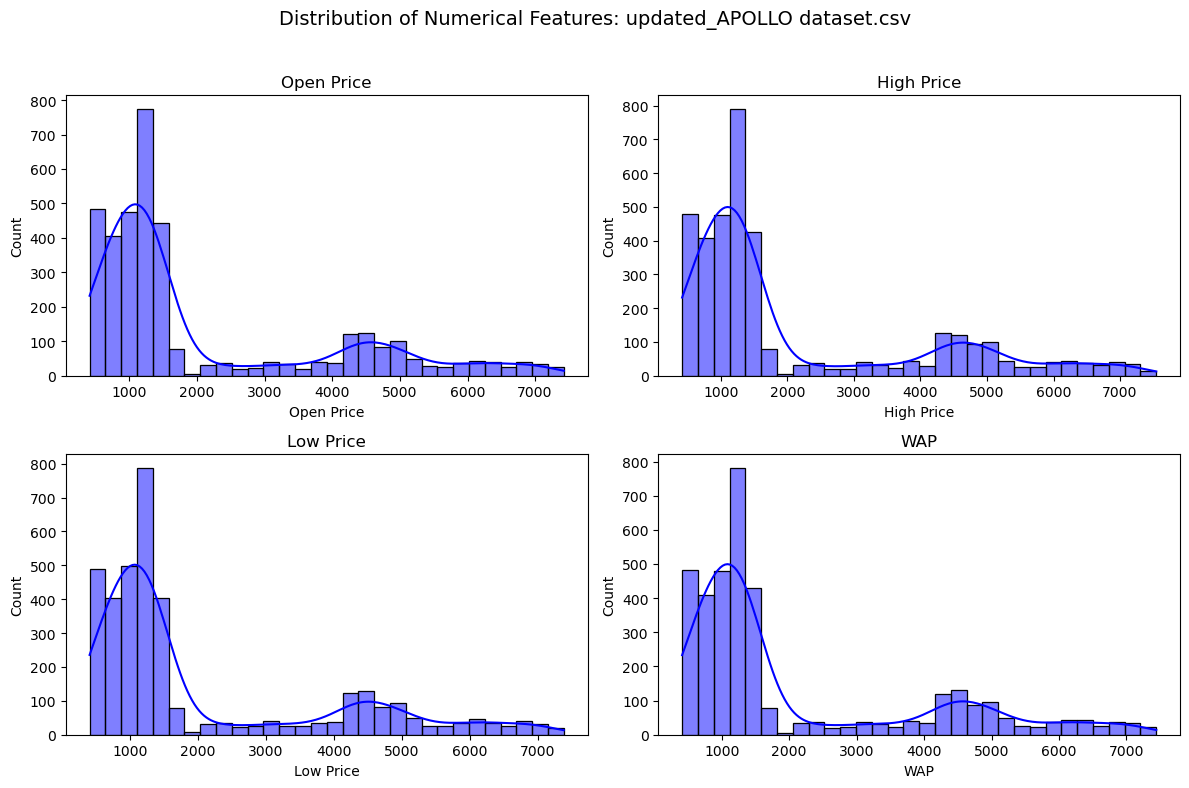

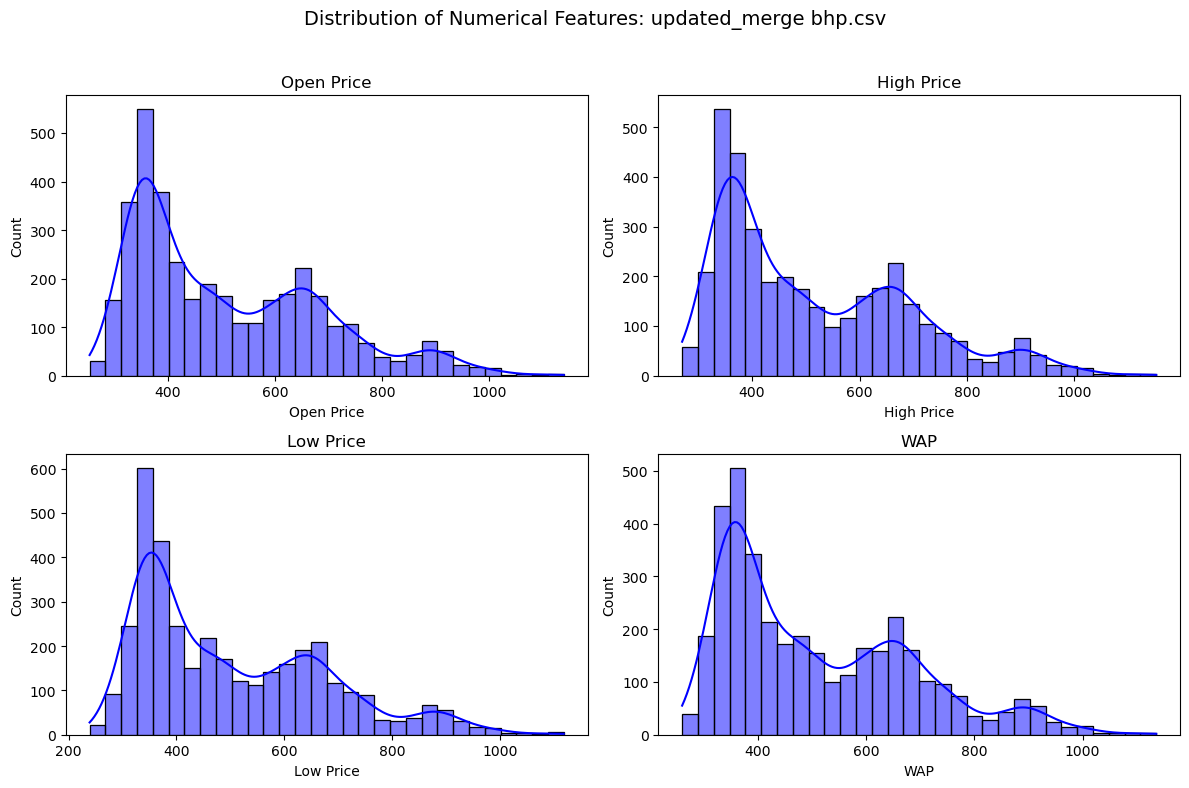

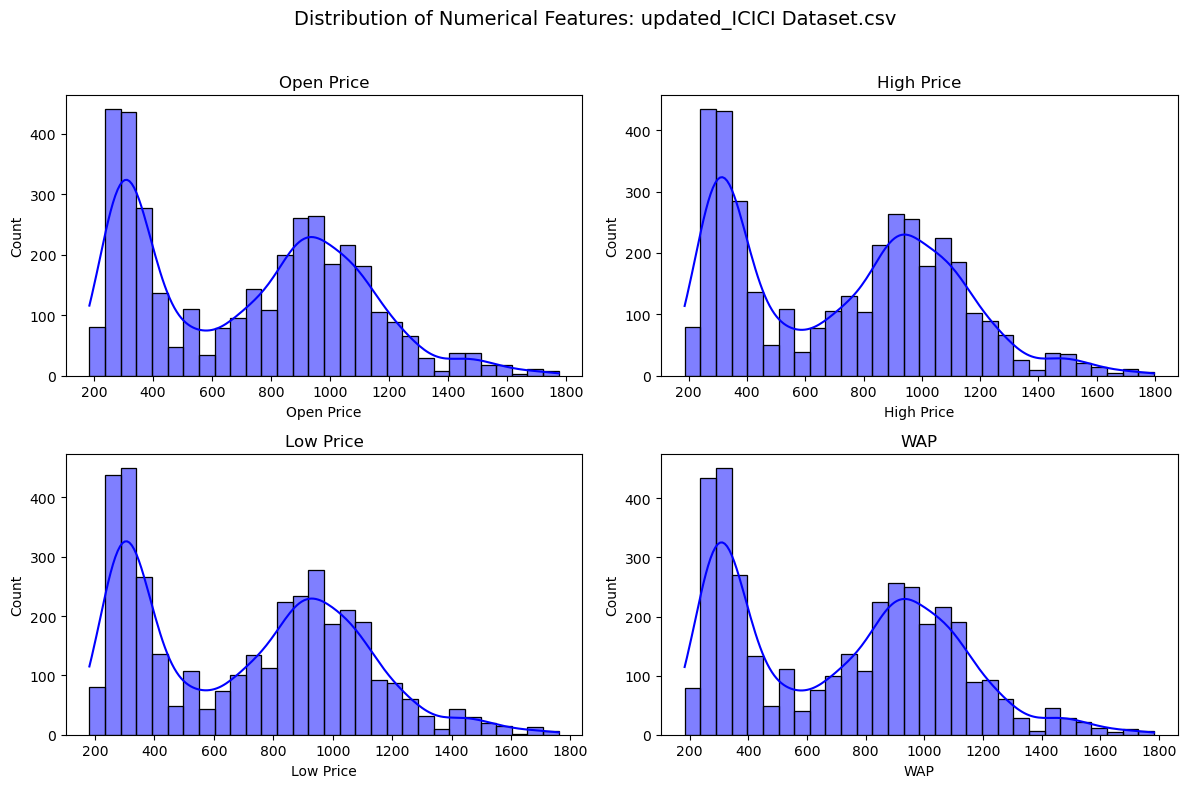

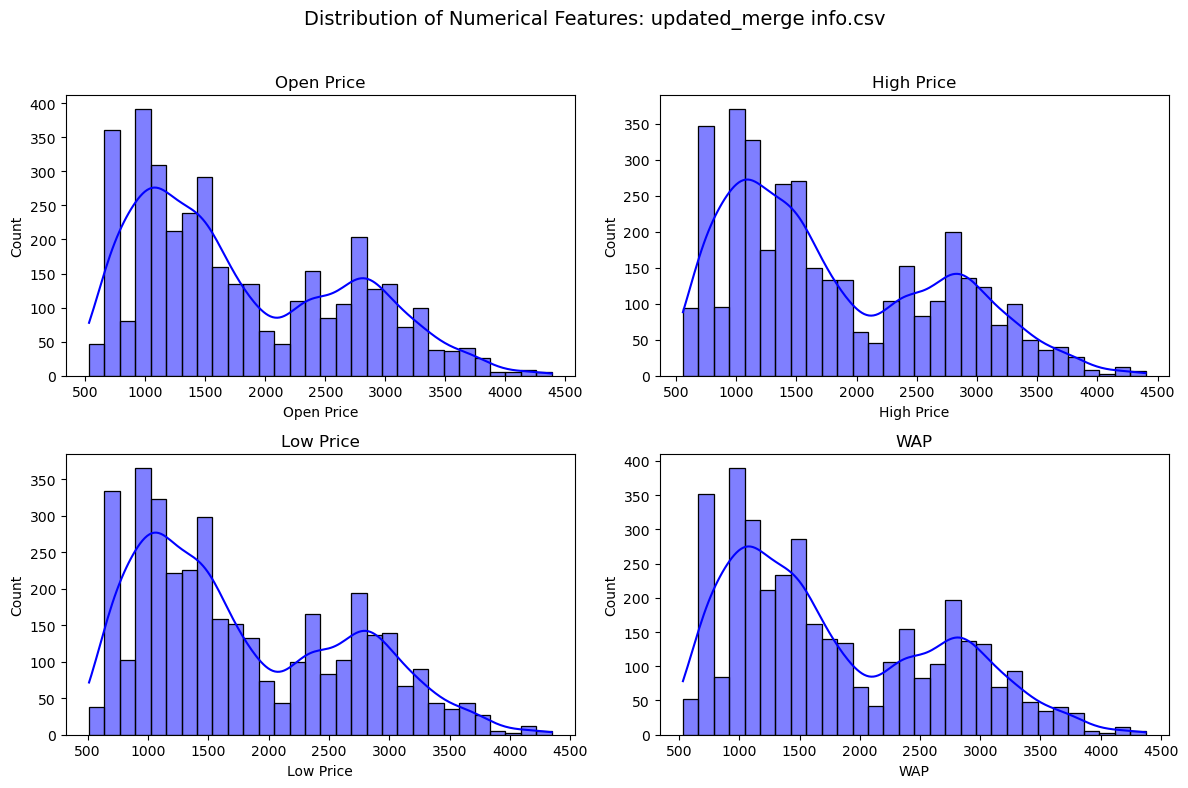

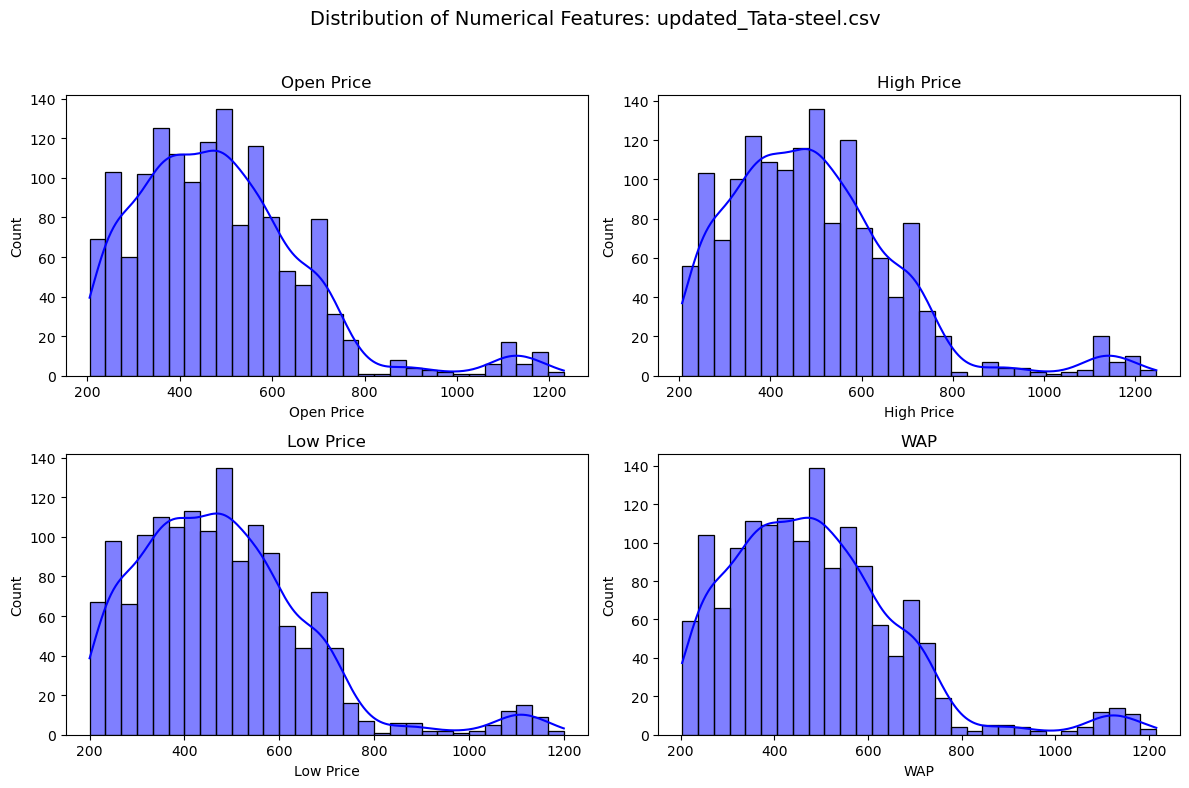

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# List of numerical columns to visualize
num_cols = ["Open Price", "High Price", "Low Price", "WAP"]

# Loop through each dataset
for file in stock_files:
    try:
        # Load the CSV file
        df = pd.read_csv(file)

        # Create a new figure for each dataset
        plt.figure(figsize=(12, 8))
        plt.suptitle(f"Distribution of Numerical Features: {file}", fontsize=14)

        # Plot original distributions
        for i, col in enumerate(num_cols):
            plt.subplot(2, 2, i + 1)
            sns.histplot(df[col], kde=True, bins=30, color="blue")
            plt.title(col)

        plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit title
        plt.show()

    except FileNotFoundError:
        print(f"File not found: {file}. Check the file path.")

    except KeyError:
        print(f"One or more columns are missing in {file}. Check column names.")

    except Exception as e:
        print(f"Error processing {file}: {e}")


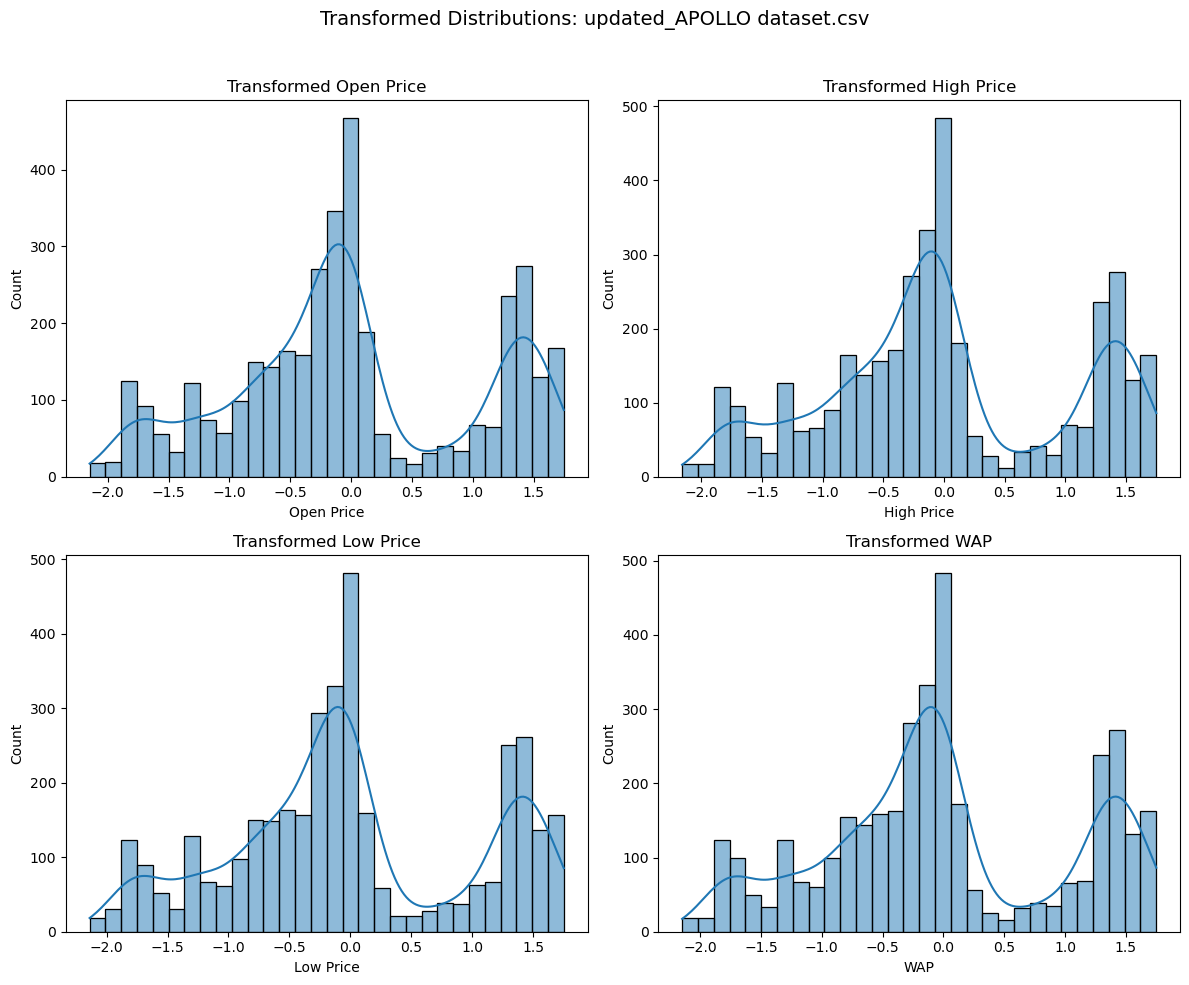

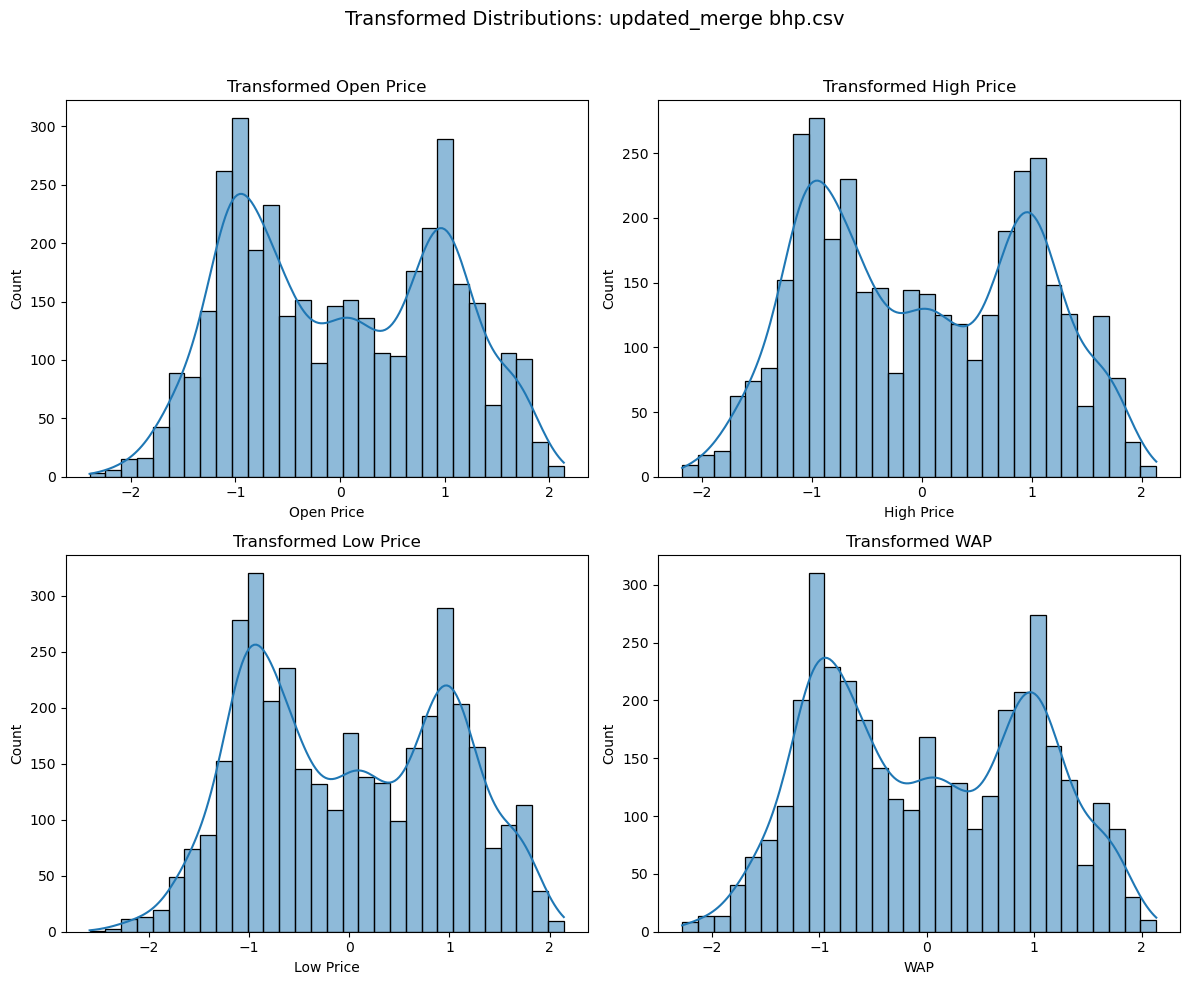

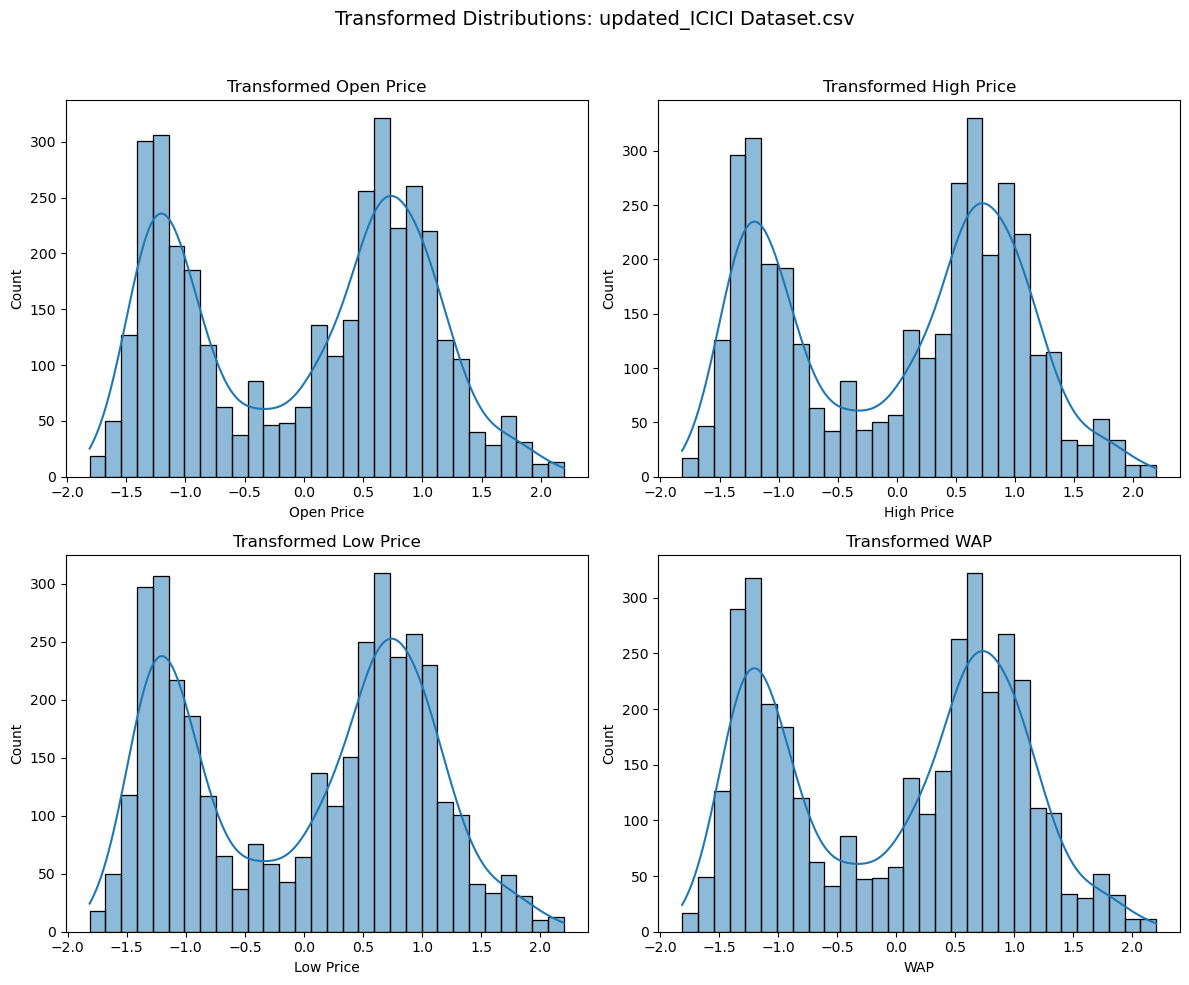

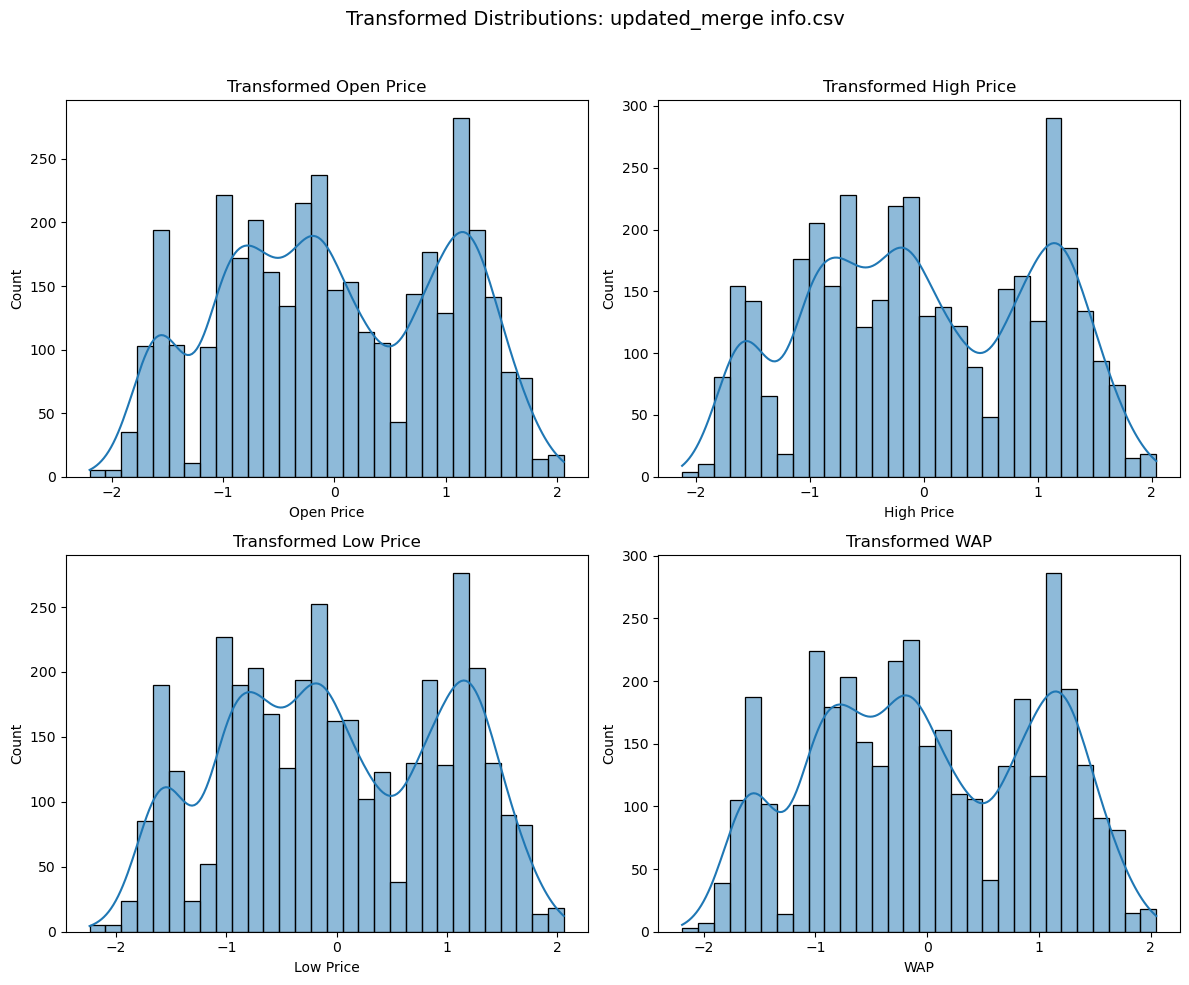

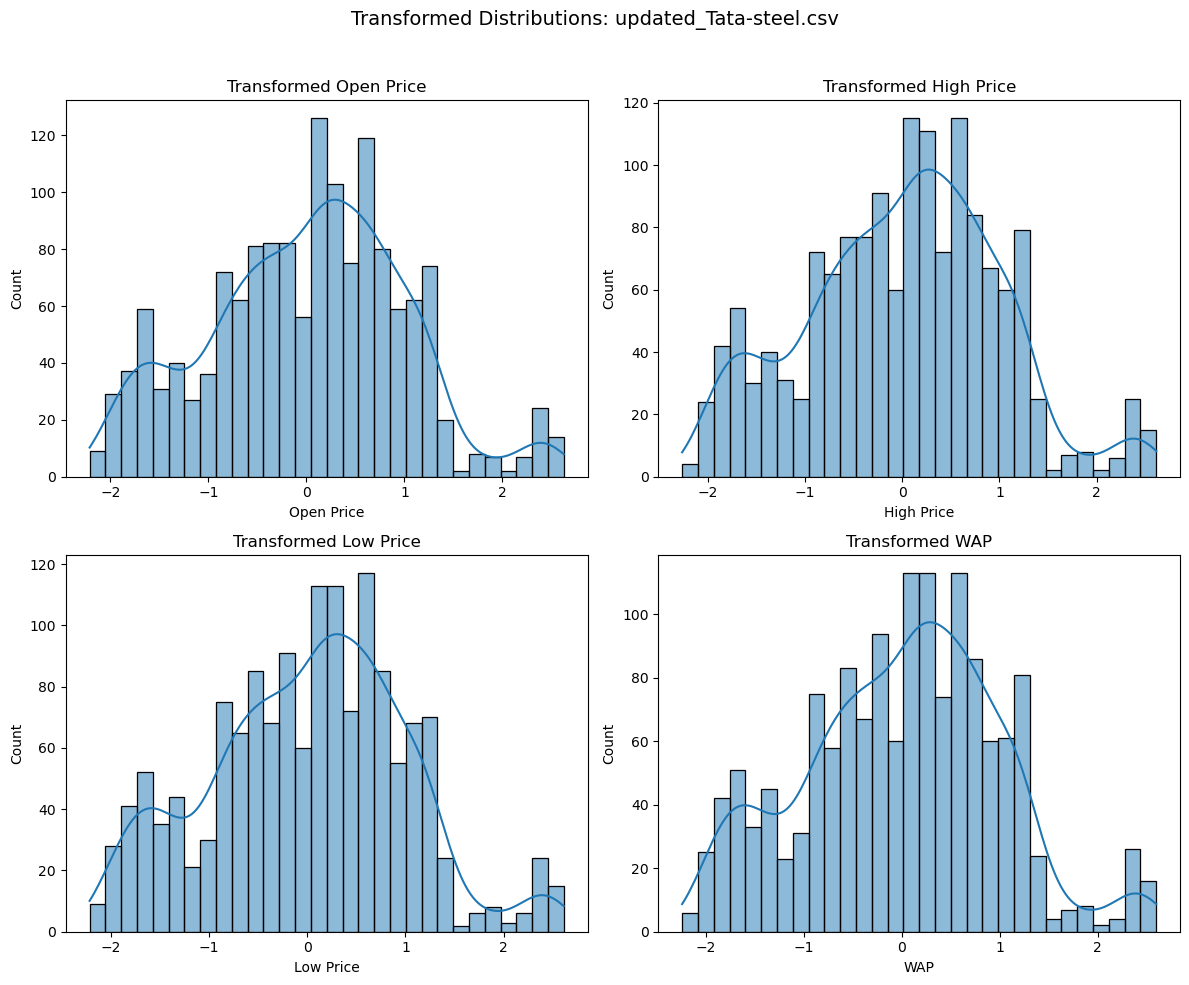

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox, yeojohnson
# List of numerical columns to transform
num_cols = ["Open Price", "High Price", "Low Price", "WAP"]

# Loop through each dataset
for file in stock_files:
    try:
        # Load the CSV file
        df = pd.read_csv(file)

        # Copy dataset for transformation
        x_transformed = df[num_cols].copy()

        # Apply Power Transformation (Box-Cox for positive data, Yeo-Johnson otherwise)
        for col in num_cols:
            if (df[col] > 0).all():
                x_transformed[col], _ = boxcox(df[col] + 1)  # Box-Cox requires positive values
            else:
                x_transformed[col], _ = yeojohnson(df[col])  # Yeo-Johnson works with all values

        # Standardization (mean = 0, std = 1)
        x_standardized = (x_transformed - x_transformed.mean()) / x_transformed.std()

        # Plot Transformed Distributions
        fig, axes = plt.subplots(2, 2, figsize=(12, 10))
        fig.suptitle(f"Transformed Distributions: {file}", fontsize=14)

        for i, col in enumerate(num_cols):
            sns.histplot(x_standardized[col], kde=True, bins=30, ax=axes[i // 2, i % 2])
            axes[i // 2, i % 2].set_title(f"Transformed {col}")

        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.show()

    except FileNotFoundError:
        print(f"File not found: {file}. Check the file path.")

    except KeyError:
        print(f"One or more columns are missing in {file}. Check column names.")

    except Exception as e:
        print(f"Error processing {file}: {e}")


In [24]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# # List of dataset filenames
# # stock_files = ["BHP_Dataset.csv", "Tata_Dataset.csv", "HDFC_Dataset.csv", "Infosys_Dataset.csv", "Reliance_Dataset.csv"]

# # List of numerical columns to plot
# num_cols = ["Open Price", "High Price", "Low Price", "WAP"]

# # Loop through each dataset
# for file in stock_files:
#     try:
#         # Load the CSV file
#         df = pd.read_csv(file)

#         # Check if columns exist
#         missing_cols = [col for col in num_cols if col not in df.columns]
#         if missing_cols:
#             print(f"Skipping {file}: Missing columns {missing_cols}")
#             continue

#         # Copy dataset for transformation
#         x_transformed = df[num_cols].copy()

#         # Plot Original Distributions
#         plt.figure(figsize=(12, 8))
#         plt.suptitle(f"Original Distributions: {file}", fontsize=14)

#         for i, col in enumerate(num_cols):
#             plt.subplot(3, 4, i + 1)
#             sns.histplot(x_transformed[col], kde=True, bins=30, color="blue")
#             plt.title(col)

#         plt.tight_layout(rect=[0, 0, 1, 0.96])
#         plt.show()

#     except FileNotFoundError:
#         print(f"File not found: {file}. Check the file path.")

#     except Exception as e:
#         print(f"Error processing {file}: {e}")


In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()

In [27]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
# Loop through each dataset
for file in stock_files:
    try:
        # Load dataset
        df = pd.read_csv(file)

        # Ensure the correct column name for Close Price
        if "Close Price" in df.columns:
            df.rename(columns={"Close Price": "Close"}, inplace=True)

        # Feature Engineering: Moving Averages & Price Change
        df["MA_10"] = df["Close"].rolling(window=10).mean()
        df["MA_50"] = df["Close"].rolling(window=50).mean()
        df["Price_Change"] = df["Close"].pct_change()

        # Drop NaN values caused by rolling window & pct_change
        df.dropna(inplace=True)

        # Define features (X) and target (y)
        X = df.drop(columns=["Date", "Close"], errors="ignore")  # Drop Date & target column
        y = df["Close"].values.reshape(-1, 1)  # Reshape for scaling

        # Split dataset into train and test
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

        # Apply PowerTransformer (Yeo-Johnson transformation)
        pt_X = PowerTransformer(method="yeo-johnson")
        X_train_scaled = pt_X.fit_transform(X_train)
        X_test_scaled = pt_X.transform(X_test)

        pt_y = PowerTransformer(method="yeo-johnson")
        y_train_scaled = pt_y.fit_transform(y_train)
        y_test_scaled = pt_y.transform(y_test)

        # Convert scaled data back to DataFrame
        X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
        X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

        print(f" Data Scaling Completed Successfully for {file}")

    except FileNotFoundError:
        print(f" File not found: {file}. Check the file path.")

    except Exception as e:
        print(f" Error processing {file}: {e}")


 Data Scaling Completed Successfully for updated_APOLLO dataset.csv
 Data Scaling Completed Successfully for updated_merge bhp.csv
 Data Scaling Completed Successfully for updated_ICICI Dataset.csv
 Data Scaling Completed Successfully for updated_merge info.csv
 Data Scaling Completed Successfully for updated_Tata-steel.csv


In [28]:
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
# Get all available files in the directory
available_files = os.listdir()

for file in stock_files:
    if file not in available_files:
        print(f" File not found: {file}. Check spelling or file path.")
        continue  # Skip missing files

    try:
        # Load dataset
        df = pd.read_csv(file)

        # Ensure "Close Price" exists
        if "Close Price" in df.columns:
            df.rename(columns={"Close Price": "Close"}, inplace=True)

        # Feature Engineering: Moving Averages & Price Change
        df["MA_10"] = df["Close"].rolling(window=10).mean()
        df["MA_50"] = df["Close"].rolling(window=50).mean()
        df["Price_Change"] = df["Close"].pct_change()

        # Drop NaN values caused by rolling window & pct_change
        df.dropna(inplace=True)

        # Define features (X) and target (y)
        X = df.drop(columns=["Date", "Close"], errors="ignore")  # Drop 'Date' & target
        y = df["Close"].values.reshape(-1, 1)

        # Split dataset into train and test
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

        # Apply PowerTransformer (Yeo-Johnson transformation)
        pt_X = PowerTransformer(method="yeo-johnson")
        X_train_scaled = pt_X.fit_transform(X_train)
        X_test_scaled = pt_X.transform(X_test)

        pt_y = PowerTransformer(method="yeo-johnson")
        y_train_scaled = pt_y.fit_transform(y_train)
        y_test_scaled = pt_y.transform(y_test)

        # Train Random Forest Regressor
        rf = RandomForestRegressor(n_estimators=100, random_state=42)
        rf.fit(X_train_scaled, y_train_scaled.ravel())  # Train RF

        # Predict using Random Forest
        rf_predictions = rf.predict(X_test_scaled)  # Predict
        rf_predictions_scaled = rf_predictions.reshape(-1, 1)

        print(f" Random Forest trained successfully for {file}")

    except Exception as e:
        print(f" Error processing {file}: {e}")


 Random Forest trained successfully for updated_APOLLO dataset.csv
 Random Forest trained successfully for updated_merge bhp.csv
 Random Forest trained successfully for updated_ICICI Dataset.csv
 Random Forest trained successfully for updated_merge info.csv
 Random Forest trained successfully for updated_Tata-steel.csv


In [29]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
# Get all available files in the directory
available_files = os.listdir()

for file in stock_files:
    if file not in available_files:
        print(f" File not found: {file}. Check spelling or file path.")
        continue  # Skip missing files

    try:
        # Load dataset
        df = pd.read_csv(file)

        # Ensure "Close Price" exists
        if "Close Price" in df.columns:
            df.rename(columns={"Close Price": "Close"}, inplace=True)

        # Feature Engineering
        df["MA_10"] = df["Close"].rolling(window=10).mean()
        df["MA_50"] = df["Close"].rolling(window=50).mean()
        df["Price_Change"] = df["Close"].pct_change()

        # Drop NaN values caused by rolling window & pct_change
        df.dropna(inplace=True)

        # Define features (X) and target (y)
        X = df.drop(columns=["Date", "Close"], errors="ignore")  # Drop 'Date' & target
        y = df["Close"].values.reshape(-1, 1)

        # Split dataset into train and test
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

        # Scale data
        scaler_X = MinMaxScaler()
        scaler_y = MinMaxScaler()
        X_train_scaled = scaler_X.fit_transform(X_train)
        X_test_scaled = scaler_X.transform(X_test)
        y_train_scaled = scaler_y.fit_transform(y_train)
        y_test_scaled = scaler_y.transform(y_test)

        # Reshape data for LSTM (samples, time_steps, features)
        X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
        X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

        # Build LSTM Model
        model = Sequential([
            LSTM(50, return_sequences=True, input_shape=(1, X_train.shape[1])),
            Dropout(0.2),
            LSTM(50, return_sequences=False),
            Dropout(0.2),
            Dense(25, activation="relu"),
            Dense(1)  # Output layer
        ])

        # Compile LSTM Model
        model.compile(optimizer="adam", loss="mean_squared_error")

        # Train LSTM Model
        model.fit(X_train_lstm, y_train_scaled, epochs=50, batch_size=16, verbose=0)

        # LSTM Predictions
        lstm_predictions = model.predict(X_test_lstm)
        lstm_predictions = scaler_y.inverse_transform(lstm_predictions)

        # Train Random Forest Regressor
        rf = RandomForestRegressor(n_estimators=100, random_state=42)
        rf.fit(X_train_scaled, y_train_scaled.ravel())

        # Predict using Random Forest
        rf_predictions = rf.predict(X_test_scaled)
        rf_predictions = rf_predictions.reshape(-1, 1)
        rf_predictions = scaler_y.inverse_transform(rf_predictions)

        # Evaluate Models
        lstm_mse = mean_squared_error(y_test, lstm_predictions)
        lstm_r2 = r2_score(y_test, lstm_predictions)

        rf_mse = mean_squared_error(y_test, rf_predictions)
        rf_r2 = r2_score(y_test, rf_predictions)

        print(f" Model Training Completed for {file}")
        print(f"LSTM MSE: {lstm_mse:.4f}, R2 Score: {lstm_r2:.4f}")
        print(f"Random Forest MSE: {rf_mse:.4f}, R2 Score: {rf_r2:.4f}\n")

    except Exception as e:
        print(f" Error processing {file}: {e}")


C:\Users\Tanmaya Pradhan\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
 Model Training Completed for updated_APOLLO dataset.csv
LSTM MSE: 582459.5507, R2 Score: 0.4432
Random Forest MSE: 342118.9404, R2 Score: 0.6729



C:\Users\Tanmaya Pradhan\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step 
 Model Training Completed for updated_merge bhp.csv
LSTM MSE: 17.0461, R2 Score: 0.9982
Random Forest MSE: 8.7758, R2 Score: 0.9991



C:\Users\Tanmaya Pradhan\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
 Model Training Completed for updated_ICICI Dataset.csv
LSTM MSE: 242.7680, R2 Score: 0.9918
Random Forest MSE: 26.0593, R2 Score: 0.9991



C:\Users\Tanmaya Pradhan\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
 Model Training Completed for updated_merge info.csv
LSTM MSE: 1126.1542, R2 Score: 0.9689
Random Forest MSE: 173.0616, R2 Score: 0.9952



C:\Users\Tanmaya Pradhan\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step  
 Model Training Completed for updated_Tata-steel.csv
LSTM MSE: 441.1472, R2 Score: 0.9944
Random Forest MSE: 20679.6285, R2 Score: 0.7352



In [30]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
# Get all available files in the directory
available_files = os.listdir()

for file in stock_files:
    if file not in available_files:
        print(f" File not found: {file}. Check spelling or file path.")
        continue  # Skip missing files

    try:
        print(f"\nProcessing {file}...")

        # Load dataset
        df = pd.read_csv(file)

        # Ensure "Close Price" exists
        if "Close Price" in df.columns:
            df.rename(columns={"Close Price": "Close"}, inplace=True)

        # Feature Engineering
        df["MA_10"] = df["Close"].rolling(window=10).mean()
        df["MA_50"] = df["Close"].rolling(window=50).mean()
        df["Price_Change"] = df["Close"].pct_change()

        # Drop NaN values caused by rolling window & pct_change
        df.dropna(inplace=True)

        # Define features (X) and target (y)
        X = df.drop(columns=["Date", "Close"], errors="ignore")  # Drop 'Date' & target
        y = df["Close"].values.reshape(-1, 1)

        # Split dataset into train and test
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

        # Scale data
        scaler_X = MinMaxScaler()
        scaler_y = MinMaxScaler()
        X_train_scaled = scaler_X.fit_transform(X_train)
        X_test_scaled = scaler_X.transform(X_test)
        y_train_scaled = scaler_y.fit_transform(y_train)
        y_test_scaled = scaler_y.transform(y_test)

        # Reshape data for LSTM (samples, time_steps, features)
        X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
        X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

        # Build LSTM Model
        model = Sequential([
            LSTM(50, return_sequences=True, input_shape=(1, X_train.shape[1])),
            Dropout(0.2),
            LSTM(50, return_sequences=False),
            Dropout(0.2),
            Dense(25, activation="relu"),
            Dense(1)  # Output layer
        ])

        # Compile LSTM Model
        model.compile(optimizer="adam", loss="mean_squared_error")

        # Train LSTM Model
        model.fit(X_train_lstm, y_train_scaled, epochs=50, batch_size=16, verbose=0)

        # LSTM Predictions
        lstm_predictions = model.predict(X_test_lstm)
        lstm_predictions = scaler_y.inverse_transform(lstm_predictions)  # Convert back to original scale

        # Train Random Forest Model
        rf = RandomForestRegressor(n_estimators=100, random_state=42)
        rf.fit(X_train_scaled, y_train_scaled.ravel())

        # RF Predictions
        rf_predictions = rf.predict(X_test_scaled)
        rf_predictions = rf_predictions.reshape(-1, 1)
        rf_predictions = scaler_y.inverse_transform(rf_predictions)  # Convert back to original scale

        # Hybrid Model (Average of LSTM and RF)
        hybrid_predictions = (lstm_predictions + rf_predictions) / 2

        # Model Evaluation
        lstm_rmse = np.sqrt(mean_squared_error(y_test, lstm_predictions))
        rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
        hybrid_rmse = np.sqrt(mean_squared_error(y_test, hybrid_predictions))

        lstm_r2 = r2_score(y_test, lstm_predictions)
        rf_r2 = r2_score(y_test, rf_predictions)
        hybrid_r2 = r2_score(y_test, hybrid_predictions)

        print(f"LSTM RMSE: {lstm_rmse:.2f}, R²: {lstm_r2:.2f}")
        print(f"RF RMSE: {rf_rmse:.2f}, R²: {rf_r2:.2f}")
        print(f"Hybrid RMSE: {hybrid_rmse:.2f}, R²: {hybrid_r2:.2f}")

    except Exception as e:
        print(f" Error processing {file}: {e}")



Processing updated_APOLLO dataset.csv...


C:\Users\Tanmaya Pradhan\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
LSTM RMSE: 370.85, R²: 0.87
RF RMSE: 584.91, R²: 0.67
Hybrid RMSE: 475.33, R²: 0.78

Processing updated_merge bhp.csv...


C:\Users\Tanmaya Pradhan\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
LSTM RMSE: 8.12, R²: 0.99
RF RMSE: 2.96, R²: 1.00
Hybrid RMSE: 4.51, R²: 1.00

Processing updated_ICICI Dataset.csv...


C:\Users\Tanmaya Pradhan\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
LSTM RMSE: 7.03, R²: 1.00
RF RMSE: 5.10, R²: 1.00
Hybrid RMSE: 4.83, R²: 1.00

Processing updated_merge info.csv...


C:\Users\Tanmaya Pradhan\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
LSTM RMSE: 27.71, R²: 0.98
RF RMSE: 13.16, R²: 1.00
Hybrid RMSE: 15.88, R²: 0.99

Processing updated_Tata-steel.csv...


C:\Users\Tanmaya Pradhan\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  
LSTM RMSE: 14.14, R²: 1.00
RF RMSE: 143.80, R²: 0.74
Hybrid RMSE: 78.18, R²: 0.92
